# Задания

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.stats
import math

from scipy import stats
from statsmodels. stats.proportion import proportion_confint
import plotly.express as px
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from scipy import stats

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

C:\Users\sv_k7\AppData\Local\Temp\ipykernel_23664\2640553426.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../datasets/pizza.csv', sep=';', low_memory=False, parse_dates=[['order_date', 'order_time']])


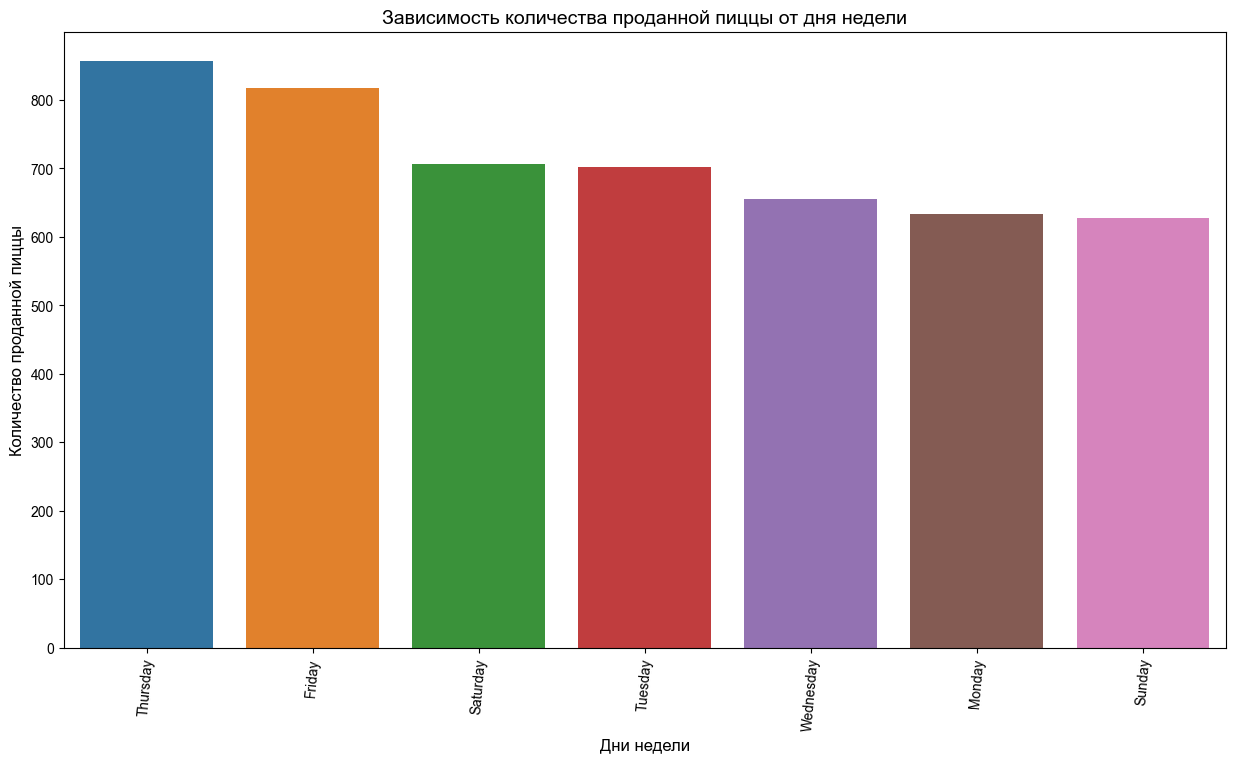

Максимум заказов: Thursday
Минимум заказов: Sunday


In [2]:
df = pd.read_csv('../datasets/pizza.csv', sep=';', low_memory=False, parse_dates=[['order_date', 'order_time']])
df['order_date_order_time'] = pd.to_datetime(df['order_date_order_time'])
df['day_name'] = df['order_date_order_time'].dt.day_name()

data = df[['pizza_id', 'day_name']]
data = data.groupby(['day_name']).count().sort_values('pizza_id', ascending=False)

fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
ax = sns.barplot(x=data.index, y=data['pizza_id'])
sns.set_style('ticks')
ax.set_ylabel('Количество проданной пиццы', fontsize=12)
ax.set_xlabel('Дни недели', fontsize=12)
plt.xticks(rotation=85)
ax.set_title('Зависимость количества проданной пиццы от дня недели', fontsize=14, fontweight='medium')
plt.show()

print('Максимум заказов:', data.index[0])
print('Минимум заказов:', data.index[-1])


### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [3]:
df['cook_time'] = (pd.to_datetime(df['lead_time']) - df['order_date_order_time']).dt.total_seconds()

print('Среднее время приготовления пиццы:', round(df['cook_time'].mean()))
print('Медианное время приготовления пиццы:', df['cook_time'].median())
print('Максимальное время приготовления пиццы:', df['cook_time'].max())
print('Минимальное время приготовления пиццы:', df['cook_time'].min())


Среднее время приготовления пиццы: 1007
Медианное время приготовления пиццы: 1006.0
Максимальное время приготовления пиццы: 1609.0
Минимальное время приготовления пиццы: 444.0


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [4]:
df_len=len(df['cook_time'])-1
scale = np.std(df['cook_time'], ddof=1) / np.sqrt(len(df['cook_time']))
interval = st.t.interval(confidence=0.95, df=df_len, loc=np.mean(df['cook_time']), scale=scale)
list(np.around(np.array(interval),0))

[1002.0, 1012.0]

In [17]:
# df = pd.read_csv('../datasets/click.csv', low_memory=False)
# df

### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [6]:
group = df.groupby('pizza_name')['cook_time'].agg(['mean', 'count', 'sem']).loc[lambda x: x['count'] >= 100]
group['ci95_hi'] = group['mean'] + 1.96 * group['sem']
group['ci95_lo'] = group['mean'] - 1.96 * group['sem']
group_max = group['ci95_hi'].idxmax()
print(group_max)


The Italian Vegetables Pizza


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления.
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [7]:
group['wide'] = group['ci95_hi'] - group['ci95_lo']
group_wide = group['wide'].idxmax ()
print(group_wide)

The Chicken Alfredo Pizza


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем,
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [8]:
df = pd.read_csv('../datasets/click.csv', low_memory=False)

len_a_1 = len(df[df['banner_a']==1])
len_a_0 = len(df[df['banner_a']==0])
len_b_1 = len(df[df['banner_b']==1])
len_b_0 =len(df[df['banner_b']==0])
proportion_confint_a = proportion_confint ( count = len_a_1 , nobs = len(df) , alpha = 0.95 , method = 'normal' )
proportion_confint_b = proportion_confint ( count = len_b_1 , nobs = len(df) , alpha = 0.95 , method = 'normal' )

result = set(proportion_confint_b) and set(proportion_confint_a)

print ('proportion_confint_a', proportion_confint_a)
print ('proportion_confint_b', proportion_confint_b)
print (result)
str = 'Да' if result else 'Нет'
print('Пересекаются ли эти интервалы? : ', str )

proportion_confint_a (0.03662569253234714, 0.037374307467652856)
proportion_confint_b (0.052555750026740594, 0.0534442499732594)
{0.03662569253234714, 0.037374307467652856}
Пересекаются ли эти интервалы? :  Да


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [9]:
import scipy.stats as stats
import numpy as np

p_a = len_a_1 / len(df['banner_a'])
p_b = len_b_1 / len(df['banner_b'])
n_a = len(df['banner_a'])
n_b = len(df['banner_b'])
z = stats.norm.ppf(1 - 0.05 / 2)
sqrt = np.sqrt((p_a * (1 - p_a) / n_a) + (p_b * (1 - p_b) / n_b))

result = [p_a - p_b - (z * sqrt), p_a - p_b + (z * sqrt)]
print('95% доверительный интервал для разности двух долей:', result)


95% доверительный интервал для разности двух долей: [-0.0341571385110543, 0.002157138511054299]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [10]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)
    p_a = np.mean(sample1)
    p_b = np.mean(sample2)
    P = (p_a * n_a + p_b * n_b) / (n_a + n_b)
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1 / n_a + 1 / n_b))

z_value = z_stat(df['banner_a'], df['banner_b'])
print(z_value)

if z_value > 0:
    print("Старый баннер лучше нового.")
else:
    print("Новый баннер лучше старого.")


-1.7258261378415294
Новый баннер лучше старого.


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

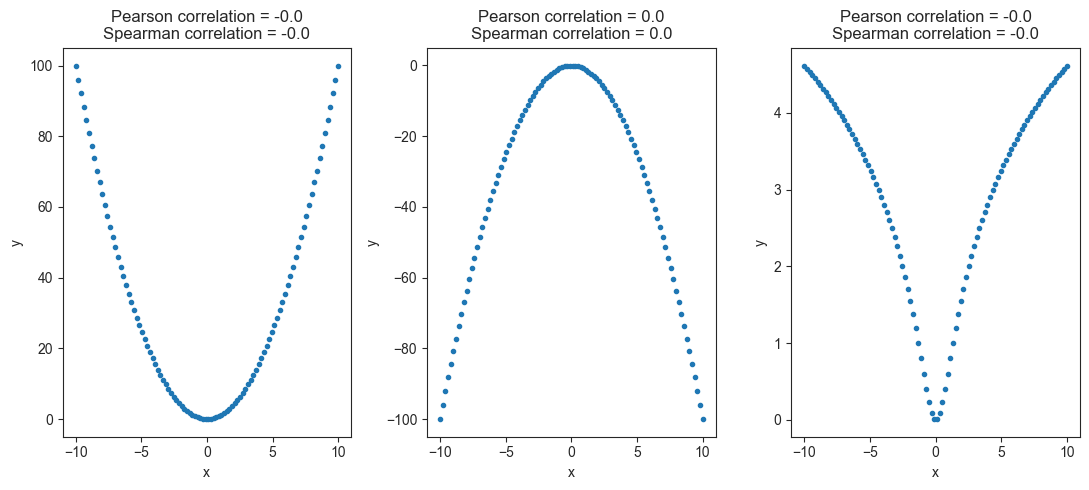

In [11]:
x = np.linspace(-10, 10, 100)
y1 = x ** 2
y2 = -x ** 2
y3 = np.log(x ** 2 + 1)

correlations = []

for y in [y1, y2, y3]:
    pearson_corr, p_p = pearsonr(x, y)
    spearman_corr, p_s = spearmanr(x, y)
    correlations.append((pearson_corr, spearman_corr))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 5))

for i, y in enumerate([y1, y2, y3]):
    ax[i].plot(x, y, '.')
    ax[i].set_title('Pearson correlation = {}\nSpearman correlation = {}'.format(round(correlations[i][0], 2), round(correlations[i][1], 2)))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

plt.tight_layout()
plt.show()


### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

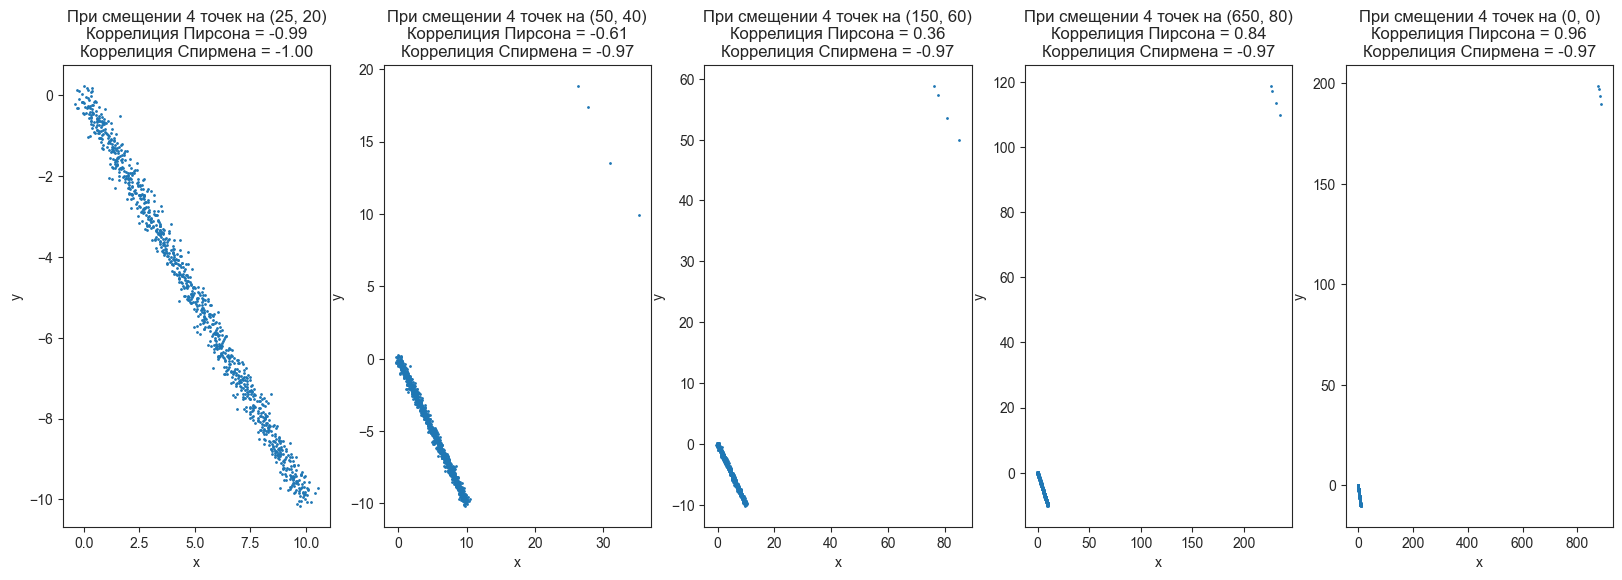

In [12]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000) * 0.2

pearson_correlation, p_p = pearsonr(x, y)
spearman_correlation, p_s = spearmanr(x, y)

index_rand = np.random.randint(0, 1000, size=4)
delta_x = [0, 25, 50, 150, 650, 0]
delta_y = [0, 20, 40, 60, 80, 0]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

for i in range(5):
    ax[i].scatter(x, y, s=1)
    ax[i].set_title(f"При смещении 4 точек на ({delta_x[i+1]}, {delta_y[i+1]})\nКоррелиция Пирсона = {np.corrcoef(x, y)[0, 1]:.2f}\nКоррелиция Спирмена = {scipy.stats.spearmanr(x, y).correlation:.2f}")
    x[index_rand] += delta_x[i+1]
    y[index_rand] += delta_y[i+1]
    ax[i].set(xlabel='x', ylabel='y')

plt.show()
